In [1]:
import json
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

import torch
torch.cuda.is_available()

True

In [2]:
from train import Trainer
my_trainer = Trainer(config_path="./config_all.json")

# Load all datasets
original = my_trainer.load_datasets()
original

['/home/thihanh/miniconda3/envs/myenv/lib/python312.zip', '/home/thihanh/miniconda3/envs/myenv/lib/python3.12', '/home/thihanh/miniconda3/envs/myenv/lib/python3.12/lib-dynload', '', '/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages', '/media/gambino/students_workdir/thihanh/IBP']
Loaded configuration successfully.
Datasets Detected: ['dataset_Pbmc10k', 'dataset_TEA']
Loaded configuration successfully.
Loaded configuration successfully.
Added `interval` annotation for features from /media/gambino/students_workdir/thihanh/IBP/h5mu_file/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellranger-arc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Added `interval` annotation for features from /media/gambino/students_workdir/thihanh/IBP/h5mu_file/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellranger-arc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Loaded configuration successfully.


{'dataset_Pbmc10k': {'modalities': ['rna', 'atac'],
  'data': [AnnData object with n_obs × n_vars = 9578 × 2000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
       var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
       uns: 'log1p', 'hvg'
       layers: 'counts',
   AnnData object with n_obs × n_vars = 9538 × 10000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
       var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo

In [3]:
my_trainer.model_select(dataset_dict=original)


=== Concatenating dataset: dataset_Pbmc10k ===

=== Concatenating dataset: dataset_TEA ===

=== Fusing dataset as MuData object: dataset_Pbmc10k ===

=== Fusing dataset as MuData object: dataset_TEA ===
Initializing Mowgli Model
Loaded configuration successfully.
Mowgli model initiated with 15 dimension.
Initializing Mowgli Model
Loaded configuration successfully.
Mowgli model initiated with 15 dimension.


{'dataset_Pbmc10k': {'mowgli': <model.Mowgli_Model at 0x738fad125520>},
 'dataset_TEA': {'mowgli': <model.Mowgli_Model at 0x738fa9cc3800>}}

In [5]:
mu = my_trainer.models["dataset_Pbmc10k"]["mowgli"].dataset
print(mu)

MuData object with n_obs × n_vars = 9505 × 12000
  obs:	'cell_type'
  var:	'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  2 modalities
    rna:	9505 x 2000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'counts'
    atac:	9505 x 10000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'tota

In [6]:
mu = my_trainer.models["dataset_TEA"]["mowgli"].dataset
print(mu)

MuData object with n_obs × n_vars = 7084 × 12046
  obs:	'cell_type'
  3 modalities
    rna:	7084 x 2000
      obs:	'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'counts'
    atac:	7084 x 10000
      obs:	'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total

In [7]:
my_trainer.train()


=== Training for dataset_Pbmc10k ===

=== mowgli training ===
GPU available
Moving Mowgli model to cuda:1
Mowgli model successfully moved to cuda:1
Training Mowgli Model


  2%|▏         | 4/200 [00:04<03:36,  1.10s/it, loss=-0.25400943, mass_transported=0.0364, loss_inner=0.10507563, inner_steps=0, gpu_memory_allocated=1.8e+9]


Saving latent data
Latent data saved to ./outputs/mowgli_output/mowgli_dataset_Pbmc10k.h5ad

=== Training for dataset_TEA ===

=== mowgli training ===
GPU available
Moving Mowgli model to cuda:1
Mowgli model successfully moved to cuda:1
Training Mowgli Model


  2%|▏         | 4/200 [00:03<02:38,  1.24it/s, loss=-0.4397349, mass_transported=0.212, loss_inner=0.20927802, inner_steps=0, gpu_memory_allocated=3.25e+9] 


Saving latent data
Latent data saved to ./outputs/mowgli_output/mowgli_dataset_TEA.h5ad


MuData object with n_obs × n_vars = 9505 × 12000
  obs:	'cell_type'
  var:	'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  obsm:	'W_OT', 'X_mowgli'
  2 modalities
    rna:	9505 x 2000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg', 'H_OT'
      layers:	'counts'
    atac:	9505 x 10000
      obs:	'domain', 'cell_type', 'n_genes_by_counts

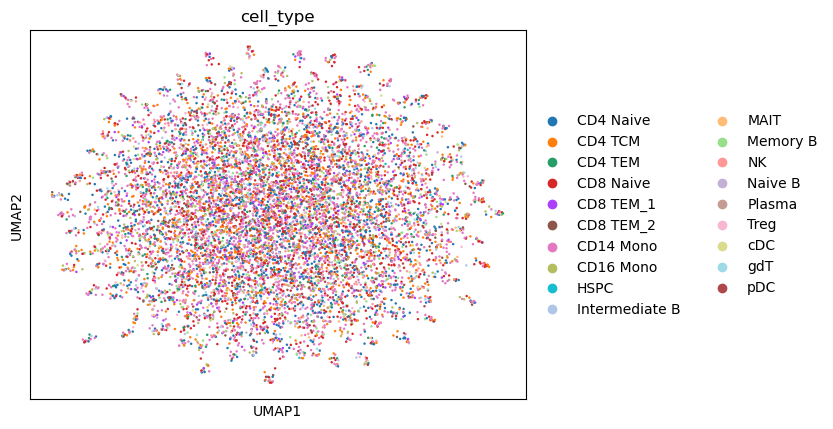

A UMAP plot for Mowgli model with dataset dataset_Pbmc10k was successfullygenerated and saved as _mowgli_dataset_Pbmc10k_umap_plot.png


In [8]:
ann = my_trainer.models["dataset_Pbmc10k"]["mowgli"].dataset
print(ann)
my_trainer.models["dataset_Pbmc10k"]["mowgli"].umap()

Loading latent data from ./outputs/mowgli_output/mowgli_dataset_TEA.h5ad
Latent data loaded successfully.
Generating UMAP plot


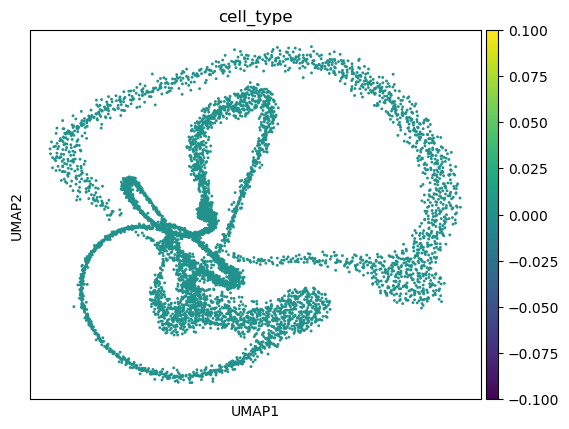

A UMAP plot for Mowgli model with dataset dataset_TEA was successfullygenerated and saved as _mowgli_dataset_TEA_umap_plot.png


In [9]:
ann = my_trainer.models["dataset_TEA"]["mowgli"].load_latent()
ann
my_trainer.models["dataset_TEA"]["mowgli"].umap()

In [10]:
ann = my_trainer.models["dataset_TEA"]["mowgli"].dataset
print(ann)

AnnData object with n_obs × n_vars = 7084 × 12046
    obs: 'rna:n_genes_by_counts', 'rna:log1p_n_genes_by_counts', 'rna:total_counts', 'rna:log1p_total_counts', 'rna:pct_counts_in_top_50_genes', 'rna:pct_counts_in_top_100_genes', 'rna:pct_counts_in_top_200_genes', 'rna:pct_counts_in_top_500_genes', 'rna:total_counts_mt', 'rna:log1p_total_counts_mt', 'rna:pct_counts_mt', 'atac:n_genes_by_counts', 'atac:log1p_n_genes_by_counts', 'atac:total_counts', 'atac:log1p_total_counts', 'cell_type', 'batch'
    var: 'rna:gene_ids', 'rna:feature_types', 'rna:genome', 'rna:interval', 'rna:mt', 'rna:n_cells_by_counts', 'rna:mean_counts', 'rna:log1p_mean_counts', 'rna:pct_dropout_by_counts', 'rna:total_counts', 'rna:log1p_total_counts', 'rna:highly_variable', 'rna:means', 'rna:dispersions', 'rna:dispersions_norm', 'atac:gene_ids', 'atac:feature_types', 'atac:genome', 'atac:interval', 'atac:n_cells_by_counts', 'atac:mean_counts', 'atac:log1p_mean_counts', 'atac:pct_dropout_by_counts', 'atac:total_counts